## Analysis
1. Urban area has largest number of rides
2. Urban area has biggest number of drivers
3. Rurual area has fewest number of rides but higest average fares

## Imports and Constants

In [22]:
import os
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Use below data structus to facliate coloring
COLOR_MAP = OrderedDict([
    ('Urban', 'lightcoral'),
    ('Suburban', 'lightskyblue'),
    ('Rural', 'gold')
    ]
)
COLORS = [COLOR_MAP[t] for t in COLOR_MAP]
TYPES = [t for t in COLOR_MAP]

## Prepare Data

In [23]:
city_file = os.path.join('raw_data', 'city_data.csv')
df_city = pd.read_csv(city_file)
df_city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [24]:
ride_file = os.path.join('raw_data', 'ride_data.csv')
df_ride = pd.read_csv(ride_file)
df_ride.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


### Merge Two Data Sets
Before merging ride data into city, summarize it first to avoid double couning of rides.

In [25]:
df_city = df_city.merge(
    df_ride.groupby('city')[['fare', 'ride_id']].agg(
        {
            'fare': 'mean',
            'ride_id': 'count',
        }
    ).reset_index().rename(
        columns={
             'fare': 'fare_average',
             'ride_id': 'ride_count',
        }
    ),
    on='city',
    how='left'
)
df_city.head()

,city,driver_count,type,fare_average,ride_count
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


## Bubble Plot of Ride Sharing Data

__Note__: When plotting the size is multiplied by 10 to show more apparent differences.

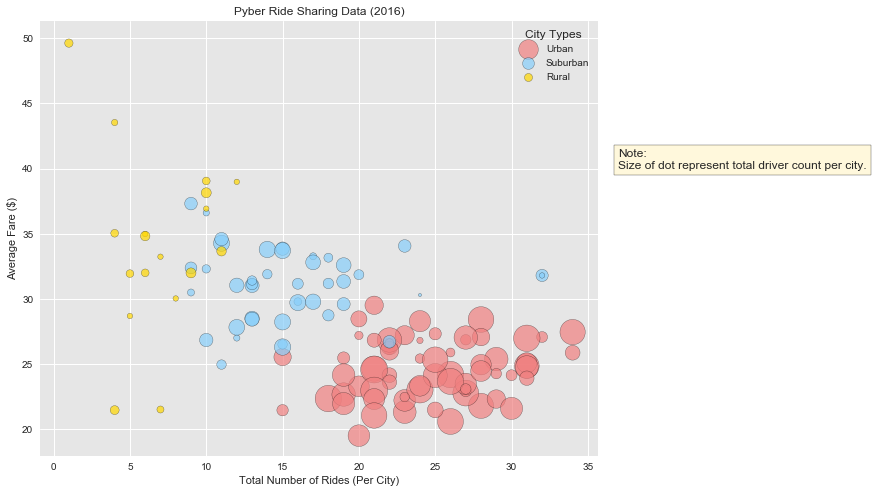

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))

# Multiply side by 10 to see differences easier
handles = [
    ax.scatter(
        s=df_city[df_city['type'] == type]['driver_count'] * 10,
        x=df_city[df_city['type'] == type]['ride_count'],
        y=df_city[df_city['type'] == type]['fare_average'],
        alpha=0.7,
        label=type,
        edgecolor='black',
        color=COLOR_MAP[type],
    ) for type in df_city['type'].unique()
]

ax.legend(
    handles=handles,
    title='City Types',
    loc='best',

)

ax.text(37, 40, 'Note:\nSize of dot represent total driver count per city.',
         fontsize=12,
         bbox=dict(facecolor='cornsilk'))

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

plt.show()

## Total Fares by City Type

### Compute Total Fares for Each City
This data set can be used on all below three pie charts. Note here that total fare is retreived from ride data, instead of computed by fare average multiply by ride count to preserer precision.

In [27]:
df_city = df_city.merge(
    df_ride.groupby('city')['fare'].sum(
    ).to_frame().reset_index().rename(
        columns={
             'fare': 'fare_total',
        }
    ),
    on='city',
    how='left'
)
df_city.head()

,city,driver_count,type,fare_average,ride_count,fare_total
0,Kelseyland,63,Urban,21.806429,28,610.58
1,Nguyenbury,8,Urban,25.899615,26,673.39
2,East Douglas,12,Urban,26.169091,22,575.72
3,West Dawnfurt,34,Urban,22.330345,29,647.58
4,Rodriguezburgh,52,Urban,21.332609,23,490.65


### Plot Pie Charts

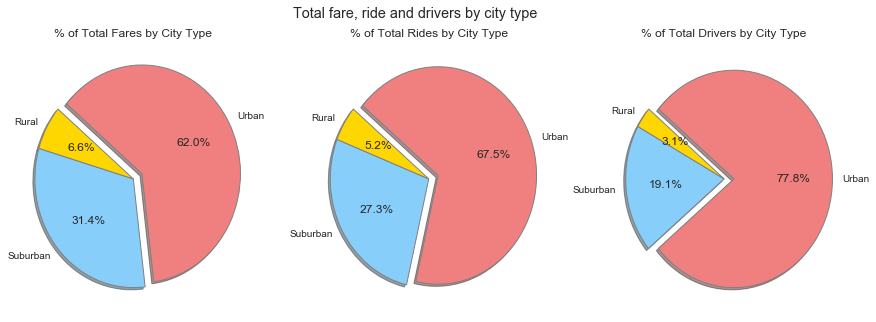

In [28]:
PIE_STYLE = {
    'startangle': 140,
    'explode': [0.1, 0, 0],
    'shadow': True,
    'pctdistance': 0.6,
    'autopct': '%1.1f%%',
    'colors': COLORS,
    'labels': TYPES,
    'counterclock': False,
    'wedgeprops': {'linewidth': 1, 'edgecolor': 'grey'}
}

fig, ax = plt.subplots(3, 1, figsize=(15, 5))
plt.suptitle("Total fare, ride and drivers by city type")

plt.subplot(131)
plt.title('% of Total Fares by City Type')
plt.pie(
    df_city.groupby('type')['fare_total'].sum()[TYPES], 
    **PIE_STYLE
)

plt.subplot(132)
plt.title('% of Total Rides by City Type')
plt.pie(
    df_city.groupby('type')['ride_count'].sum()[TYPES],
    **PIE_STYLE
)

plt.subplot(133)
plt.title('% of Total Drivers by City Type')
plt.pie(
    df_city.groupby('type')['driver_count'].sum()[TYPES], 
    **PIE_STYLE
)

plt.show()